# Manipulating ADCP data from FORSA and M124 cruises

In [1]:
## Imports
import level1,level2,analysis,plottools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import datetime as dt

## Open files

In [2]:
path1 = '/home/affholder/Documents/Stage/Araujo/Eddie_Tracks/FORSA_Data/FORSA_data/ADCP/'
path2 = '/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/FORSA_Data/FORSA_data/ADCP/'
FORSA_path = path2
FORSA_filename = '151701.dat'
path3 = '/home/affholder/Documents/Stage/Araujo/Eddie_Tracks/M124_Data/ADCP/'
path4 = '/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/M124_Data/ADCP/'
M124_path = path4
M124_filename = 'M124_ADCP_38khz.txt'

In [ ]:
ADCP_F = level1.FORSA_translate(FORSA_path + FORSA_filename)
ADCP_M = level1.Meteor_translate(M124_path + M124_filename)

In [3]:
# Alternatively
ADCP_F = np.load(FORSA_path + 'ADCP_FORSA.npy').item()
ADCP_M = np.load(M124_path + 'ADCP_M38.npy').item()

In [4]:
# SSH data
SSH = nc.Dataset('../../SSHfields/global-analysis-forecast-phy-001-024_1522088461261.nc')

### Tracks of both campaigns

/usr/lib/python3/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


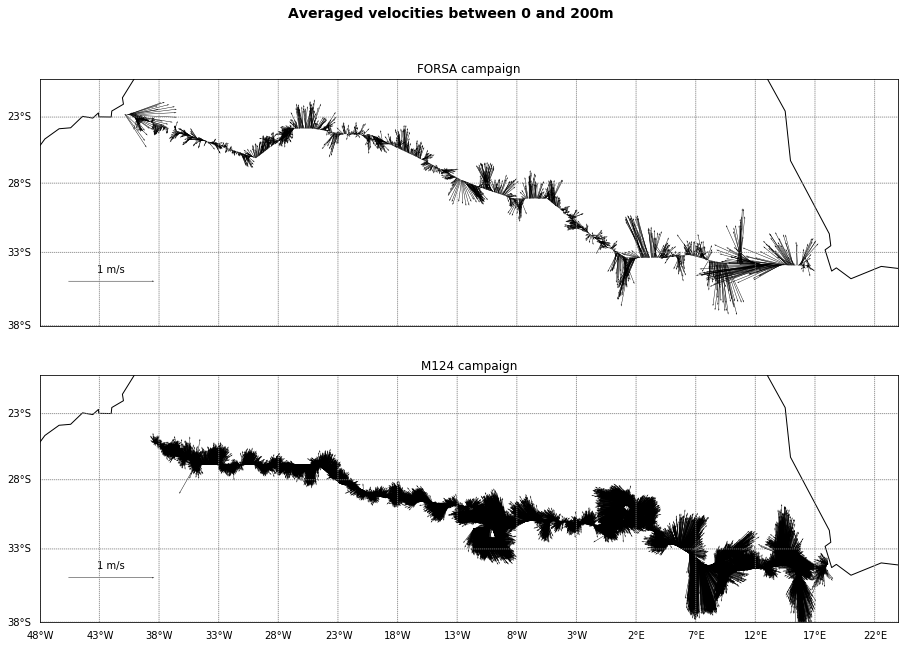

In [5]:
# Set up the figure
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
# Set up the limits and grid
lonmin = -48
lonmax = 24
latmin = -38
latmax = -20
grid = 5
maxdepth = 200
# Set up the projections
m1 = Basemap(ax=ax1,projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
m2 = Basemap(ax=ax2,projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
# Draw the map
m1.drawcoastlines()
m2.drawcoastlines()
# Draw parallels and meridians
parallels = np.arange(latmin,latmax,grid)
meridians = np.arange(lonmin,lonmax,grid)
m1.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m1.drawmeridians(meridians,labels=[0,0,0,0],color='grey')
m2.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m2.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
# Plot the course and the currents
    # FORSA data
flon = ADCP_F['longitudes']
flat = ADCP_F['latitudes']
fU_m = np.nanmean(ADCP_F['U'][:,ADCP_F['depths'] < maxdepth],axis=1)
fV_m = np.nanmean(ADCP_F['V'][:,ADCP_F['depths'] < maxdepth],axis=1)
    # METEOR data
mlon = ADCP_M['longitudes']
mlat = ADCP_M['latitudes']
mU_m = np.nanmean(ADCP_M['U'][:,ADCP_M['depths'] < maxdepth],axis=1)
mV_m = np.nanmean(ADCP_M['V'][:,ADCP_M['depths'] < maxdepth],axis=1)
    # Plot everything
Qf = m1.quiver(flon,flat,fU_m,fV_m,latlon=True,scale=10,pivot='tail',width=0.0005)
Qm = m2.quiver(mlon,mlat,mU_m,mV_m,latlon=True,scale=10,pivot='tail',width=0.0005)
xleg = -42
yleg = -35
xlf,ylf = m1(xleg,yleg)
xlm,ylm = m2(xleg,yleg)
ax1.quiverkey(Qf,xlf,ylf,1, '1 m/s', coordinates='data')
ax2.quiverkey(Qm,xlm,ylm,1, '1 m/s', coordinates='data')

fig.suptitle('Averaged velocities between 0 and 200m', fontsize=14, fontweight='bold')
ax1.set_title('FORSA campaign')
ax2.set_title('M124 campaign')

plt.show()

## Extract data relative to eddies of interest

In [5]:
eddies = {'V1':{'ID':3697413,'box_X':[-0.5,5,5,-0.5,-0.5],'box_Y':[-35,-35,-30,-30,-35],'date':dt.datetime(2015,7,1)},
          'V3':{'ID':3699716,'box_X':[-14,-7.5,-7.5,-14,-14],'box_Y':[-31,-31,-26,-26,-31],'date':dt.datetime(2015,7,6)},
          'M10':{'ID':3810383,'box_X':[-12.5,-7.5,-7.5,-12.5,-12.5],'box_Y':[-34.5,-34.5,-29.5,-29.5,-34.5],'date':dt.datetime(2016,3,8)},
          'M12':{'ID':3812686,'box_X':[-26.5,-22,-22,-26.5,-26.5],'box_Y':[-30,-30,-25,-25,-30],'date':dt.datetime(2016,3,13)}}
ADCP_M10 = level2.PolygonSubsetter(ADCP_M,eddies['M10']['box_X'],eddies['M10']['box_Y'])
ADCP_V1 = level2.PolygonSubsetter(ADCP_F,eddies['V1']['box_X'],eddies['V1']['box_Y'])
ADCP_M12 = level2.PolygonSubsetter(ADCP_M,eddies['M12']['box_X'],eddies['M12']['box_Y'])
ADCP_V3 = level2.PolygonSubsetter(ADCP_F,eddies['V3']['box_X'],eddies['V3']['box_Y'])

## Adapt the coordinates

Here we add a coordinate system in meters to the matrixes enabling proper plotting of raw data which is the along-track distance

First, for the eddy extracted from the FORSA dataset, where horizontal resolution is around 4km and vertical resolution around 16m (goes to 700m).  
Here, the data is put on a regular grid for more accurate viewing. The resolution of the regular grid is still 4km but regular. 

A boxcar filter of dimensions (10km,130m) is applied to extract the mesoscale

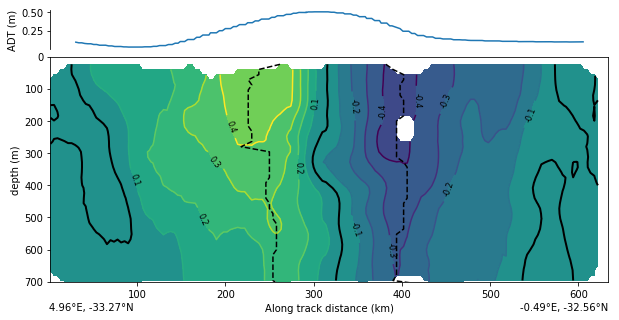

In [29]:
ADCP = ADCP_V1
lon1 = ADCP['longitudes']
lat1 = ADCP['latitudes']
depths1 = ADCP['depths']
V1 = ADCP['V']
atd1 = analysis.ComputeATD(lon1,lat1)
V_reg1,atd_reg1 = analysis.RegularGrid(V1,atd1,4000,depths1)
V_reg_filt1 = analysis.BoxCarFilter(V_reg1,5,3)
ssh = analysis.TrackSSH(lon1,lat1,SSH,eddies['V1']['date'])

fig = plt.figure(figsize=(10,5))
ax2 = plt.subplot2grid((6, 1), (0, 0))
ax1 = plt.subplot2grid((6, 1), (1, 0), rowspan=5)
ax1.set_ylim(700,0)

plottools.PlotADCP(ax1,atd_reg1,depths1,V_reg_filt1)
plottools.PlotMaxMin(ax1,V_reg_filt1,atd_reg1,depths1)
# Plot SSH
ax2.plot(atd1/100,ssh)
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.yaxis.set_ticks([.25,.5])
ax2.xaxis.set_ticks([])
ax2.set_ylabel('ADT (m)')
ax1.set_ylabel('depth (m)')
ax1.set_xlabel('Along track distance (km)')

ax1.text(0,780,str(np.round(lon1[0],2)) + '°E, ' + str(np.round(lat1[0],2)) + '°N',horizontalalignment='left',verticalalignment='center')
ax1.text(max(atd_reg1/1000),780,str(np.round(lon1[-1],2)) + '°E, ' + str(np.round(lat1[-1],2)) + '°N',horizontalalignment='right',verticalalignment='center')

plt.savefig('V1_atd.pdf')
plt.show()

Now for the Meteor dataset, the resolution is 32m depth until 1200m and 400m horizontal

In [65]:
lon = ADCP_M12['longitudes']
lat = ADCP_M12['latitudes']
depths = ADCP_M12['depths']
V = ADCP_M12['V']
atd = analysis.ComputeATD(lon,lat)
V_reg,atd_reg = analysis.RegularGrid(V,atd,400,depths)
V_reg_filt = analysis.BoxCarFilter(V_reg,16,2)
ssh = analysis.TrackSSH(lon,lat,SSH,eddies['V1']['date'])

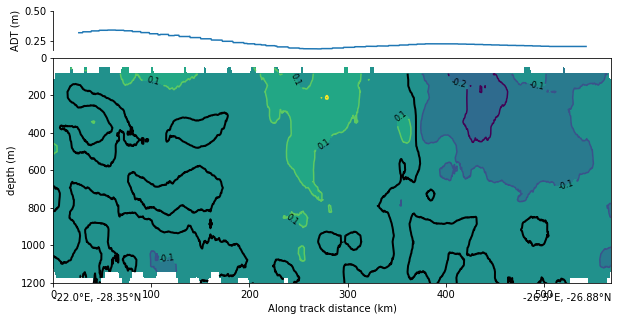

In [66]:
# Figure
fig = plt.figure(figsize=(10,5))
ax2 = plt.subplot2grid((6, 1), (0, 0))
ax1 = plt.subplot2grid((6, 1), (1, 0), rowspan=5)
ax1.set_ylim(1200,0)

plottools.PlotADCP(ax1,atd_reg,depths,V_reg_filt)
#plottools.PlotMaxMin(ax1,V_reg_filt,atd_reg,depths)
# Plot SSH
ax2.plot(atd/100,ssh)
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.yaxis.set_ticks([.25,.5])
ax2.xaxis.set_ticks([])
ax2.set_ylabel('ADT (m)')
ax1.set_ylabel('depth (m)')
ax1.set_xlabel('Along track distance (km)')

ax1.text(0,1280,str(np.round(lon[0],2)) + '°E, ' + str(np.round(lat[0],2)) + '°N',horizontalalignment='left',verticalalignment='center')
ax1.text(max(atd_reg/1000),1280,str(np.round(lon[-1],2)) + '°E, ' + str(np.round(lat[-1],2)) + '°N',horizontalalignment='right',verticalalignment='center')

#plt.savefig('M10_atd.pdf')
plt.show()

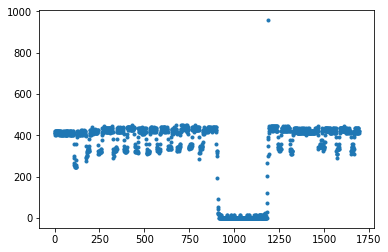

In [36]:
plt.plot(atd[1:] - atd[:-1],'.')

In [136]:
np.where(time == eddies['V1']['date'] + dt.timedelta(hours=12))

(array([584]),)

In [142]:
lon_index = []
lat_index = []
time_index = np.where(time == eddies['V1']['date'] + dt.timedelta(hours=12))[0][0]
ssh = []
xstep = SSH['longitude'].step
ystep = SSH['latitude'].step
ssh_xaxis = SSH['longitude'][:]
ssh_yaxis = SSH['latitude'][:]
zos = SSH['zos'][time_index,:,:]
for i in range(len(lon1)):
    longitude = lon1[i]
    latitude = lat1[i]
    lg_idx = np.where((ssh_xaxis >= longitude - xstep/2)*(ssh_xaxis <= longitude + xstep/2))[0][0]
    lon_index.append(lg_idx)
    lt_idx = np.where((ssh_yaxis >= latitude - ystep/2)*(ssh_yaxis <= latitude + ystep/2))[0][0]
    lat_index.append(lt_idx)
    ssh.append(zos[lt_idx,lg_idx])
lon_index = np.array(lon_index)
lat_index = np.array(lat_index)
ssh = np.array(ssh)

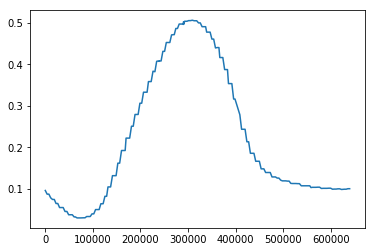

In [143]:
plt.plot(atd1,ssh)

In [147]:
SSH

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    institution: MERCATOR OCEAN
    references: http://www.mercator-ocean.fr
    source: MERCATOR PSY4QV3R1
    Conventions: CF-1.0
    history: Data extracted from dataset http://opendap-glo.mercator-ocean.fr:8080/thredds/dodsC/global-analysis-forecast-phy-001-024
    time_min: 560124.0
    time_max: 585156.0
    julian_day_unit: hours since 1950-01-01 00:00:00
    latitude_min: -45.0
    latitude_max: -15.0
    longitude_min: -60.0
    longitude_max: 30.0
    dimensions(sizes): time(1044), latitude(361), longitude(1081)
    variables(dimensions): int16 zos(time,latitude,longitude), float32 time(time), float32 longitude(longitude), float32 latitude(latitude)
    groups: 

In [121]:
len(ssh_yaxis)

361

In [110]:
zos0 = SSH['zos'][0,:,:]

In [97]:
len(time)

1044

In [62]:
max(ssh_yaxis)

-15.0

In [63]:
latitude - step/2

-33.416664123535156

In [89]:
latitude + step/2

-33.333335876464844

In [90]:
ssh_yaxis[140]

-33.333332

In [87]:
ssh_yaxis[141]  latitude - step/2

True